In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import keras 
import numpy as np 
import os 
import pathlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from IPython.display import display, Image

In [2]:
!nvidia-smi

Fri Dec 26 16:33:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 590.44.01              Driver Version: 591.44         CUDA Version: 13.1     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 5070 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P4             14W /   78W |       0MiB /  12227MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
data_dir = "/data/dog-breed-identification"
test_dir = "data/dog-breed-identification/test/"

In [4]:
labels_df = pd.read_csv("data/dog-breed-identification/labels.csv")
labels_df[:5]

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
train_images = os.listdir("data/dog-breed-identification/train/")
train_images[:5]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [6]:
len(labels_df) == len(train_images)

True

In [7]:
train_img_filepaths = ["data/dog-breed-identification/train/" + file for file in train_images]
train_img_filepaths[:5]

['data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [8]:
labels_df['filepath'] = train_img_filepaths

In [9]:
labels_df[:2].T

,0,1
id,000bec180eb18c7604dcecc8fe0dba07,001513dfcb2ffafc82cccf4d8bbaba97
breed,boston_bull,dingo
filepath,data/dog-breed-identification/train/000bec180e...,data/dog-breed-identification/train/001513dfcb...


<Axes: xlabel='breed'>

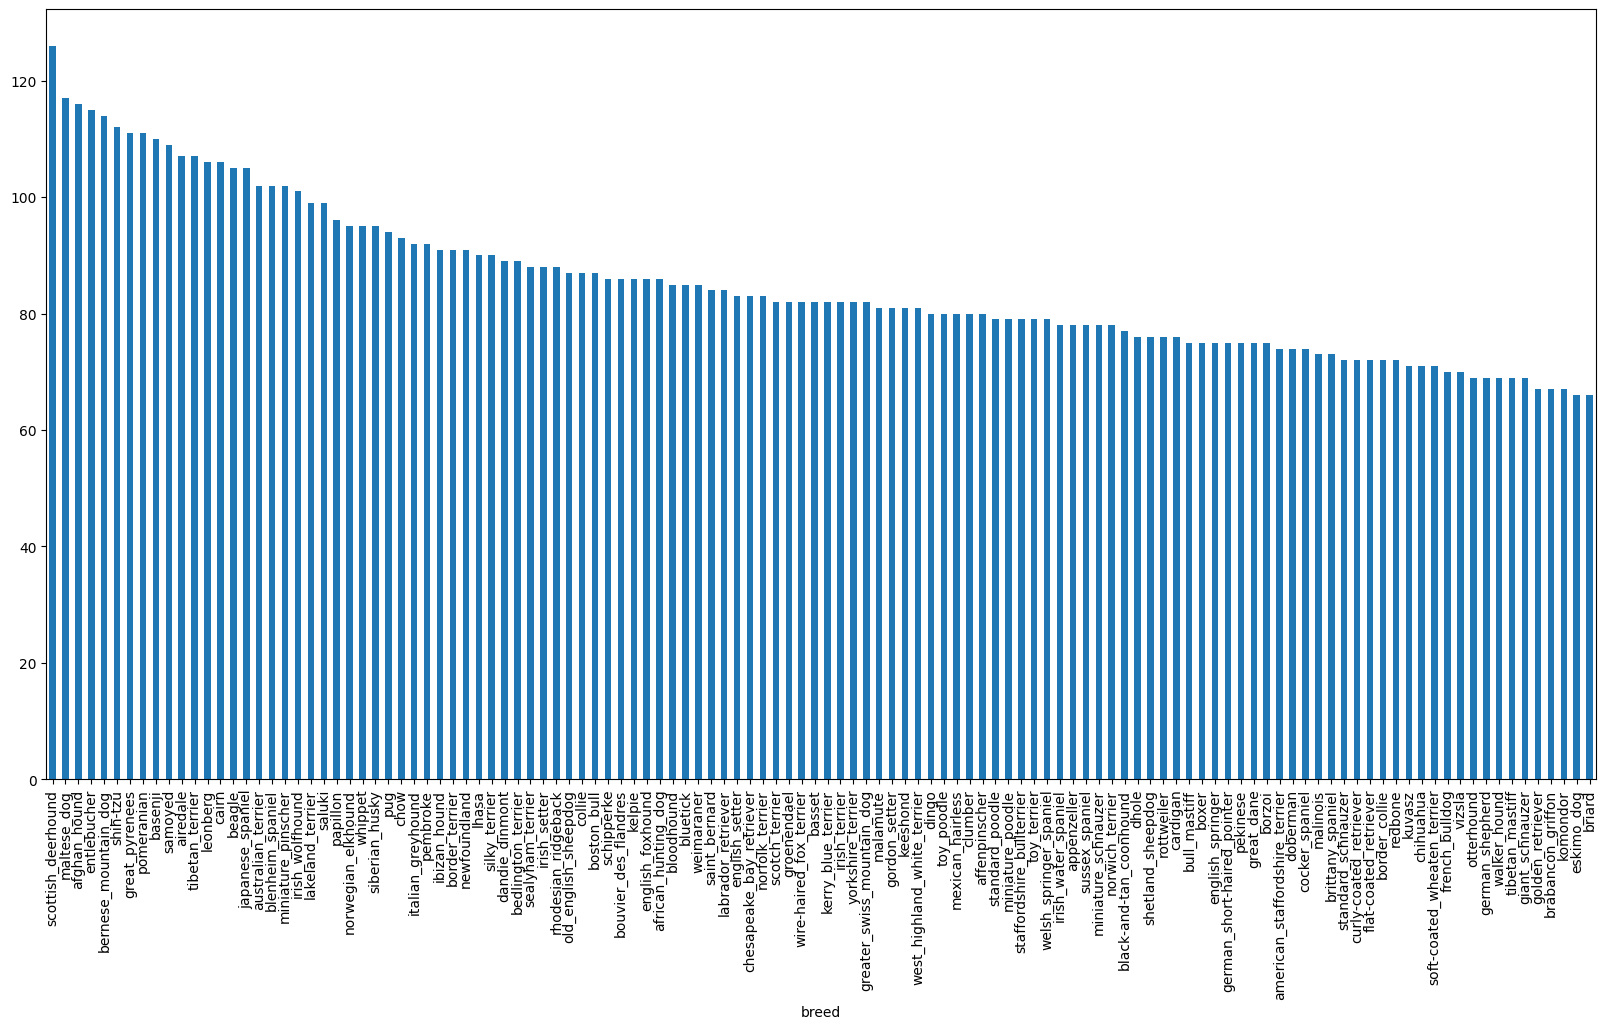

In [10]:
labels_df.breed.value_counts().plot.bar(figsize=(20, 10))

In [11]:
labels_df.describe()

,id,breed,filepath
count,10222,10222,10222
unique,10222,120,10222
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound,data/dog-breed-identification/train/000bec180e...
freq,1,126,1


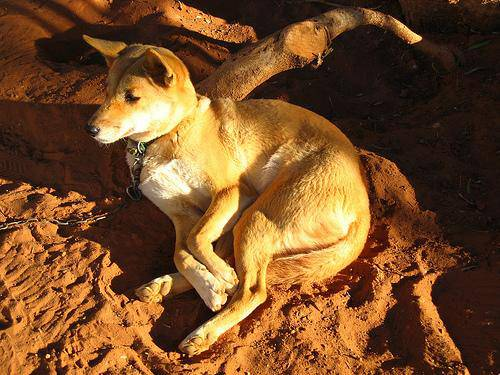

In [12]:
Image(train_img_filepaths[1])

In [13]:
filepaths = labels_df.filepath.to_numpy()
labels = labels_df.breed.to_numpy()

In [14]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
bool_labels = [(label == unique_breeds).astype(int) for label in labels]
bool_labels[:1]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [16]:
X = filepaths
y = bool_labels 

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  random_state=42)


In [17]:
X_train.shape, len(y_train), X_val.shape, len(y_val)

((8177,), 8177, (2045,), 2045)

In [18]:
IMG_SIZE = (224, 224)
def preprocess_image(filepath):
    img = tf.io.read_file(filepath) 
    img = tf.image.decode_jpeg(img, channels=3) 
    # img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=IMG_SIZE) 
    return img

def process_image_with_label(filepath, label): 
    return preprocess_image(filepath), label

In [19]:
process_image_with_label(X_train[0], y_train[0])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[187.98445 , 191.98445 , 190.98445 ],
         [208.27216 , 212.27216 , 211.27216 ],
         [229.5128  , 233.5128  , 232.5128  ],
         ...,
         [ 57.348213,  98.34821 , 144.34822 ],
         [ 54.348213,  97.34821 , 142.34822 ],
         [ 56.732155,  99.732155, 144.73216 ]],
 
        [[161.98393 , 165.98393 , 164.98393 ],
         [239.27406 , 243.27406 , 242.27406 ],
         [248.23984 , 251.33046 , 251.23984 ],
         ...,
         [ 62.034813, 100.03481 , 147.0348  ],
         [ 57.964825, 100.94589 , 145.95535 ],
         [ 59.35046 , 102.35046 , 147.35046 ]],
 
        [[195.27812 , 199.27812 , 199.64865 ],
         [220.05554 , 224.05554 , 224.42609 ],
         [217.24261 , 221.24261 , 221.61314 ],
         ...,
         [ 56.629463,  94.62946 , 141.62947 ],
         [ 53.581688,  94.67724 , 140.62947 ],
         [ 55.698673,  97.32814 , 143.01341 ]],
 
        ...,
 
        [[166.71965 , 174.03441 

In [20]:
## Create Data Batches 
BATCH_SIZE = 32

def create_batches(X, y, batch_size=BATCH_SIZE, valid_data=False, test_data=False): 
    if test_data: 
        print("Creating test data batches!...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        databatch = data.map(preprocess_image).batch(batch_size=batch_size)

    if valid_data: 
        print("Creating validation data batches!...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                                tf.constant(y))
                                               )
        databatch = data.map(process_image_with_label).batch(batch_size=batch_size)

    else: 
        print("Creating traning data batches!...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), 
            tf.constant(y))
        )
        data = data.shuffle(buffer_size=len(X), seed=42)
        databatch = data.map(process_image_with_label).batch(batch_size=batch_size)
    return databatch

In [21]:
train_ds = create_batches(X=X_train, 
                         y=y_train)

Creating traning data batches!...


In [22]:
len(train_ds)

256

In [23]:
val_ds = create_batches(
    X=X_val, 
    y=y_val, 
    valid_data=True
)

Creating validation data batches!...


In [24]:
len(val_ds)

64

In [25]:
num_classes = len(unique_breeds)
num_classes

120

In [26]:
## Model-1 

keras.utils.set_random_seed=42 

model_1 = keras.Sequential([
    keras.Input(shape=IMG_SIZE+(3,)),
    keras.layers.Rescaling(1/255.),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_classes, activation="softmax")
])

model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        12,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,085,220 (57.55 MB)

 Trainable params: 15,085,220 (57.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history_1 = model_1.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    verbose=1
)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0088 - loss: 9.5142 - val_accuracy: 0.0108 - val_loss: 4.7859
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0103 - loss: 4.7844 - val_accuracy: 0.0098 - val_loss: 4.7843
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0118 - loss: 4.7822 - val_accuracy: 0.0098 - val_loss: 4.7831
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0108 - loss: 4.7802 - val_accuracy: 0.0103 - val_loss: 4.7828
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0090 - loss: 4.7785 - val_accuracy: 0.0098 - val_loss: 4.7831
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0118 - loss: 4.7773 - val_accuracy: 0.0098 - val_loss: 4.7836
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0140 - loss: 4.7762 - val_accuracy: 0.0098 - val_loss: 4.7839
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0101 - loss: 4.7738 - val_accuracy: 0

In [28]:
## Result : Simple model fails - Try with data augmentation

In [29]:
## Model-2 - augmented_simple model 

data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.15), 
    keras.layers.RandomTranslation(height_factor=(-0.2, 0.2), 
                                  width_factor=(-0.2, 0.2)), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomBrightness(0.2)
], name="augmentation_layer")

In [30]:
# Create and compile model_2 

model_2 = keras.Sequential([
    keras.Input(shape=IMG_SIZE+(3,)), 
    data_augmentation, 
    keras.layers.Rescaling(1/255.), 
    keras.layers.Flatten(), 
    # keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

model_2.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation_layer (Sequential) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        12,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,075,120 (57.51 MB)

 Trainable params: 15,075,120 (57.51 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history_2 = model_2.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    verbose=1
)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0121 - loss: 9.0249 - val_accuracy: 0.0098 - val_loss: 4.7857
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0091 - loss: 4.7845 - val_accuracy: 0.0098 - val_loss: 4.7846
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0101 - loss: 4.7819 - val_accuracy: 0.0098 - val_loss: 4.7839
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0121 - loss: 4.7785 - val_accuracy: 0.0098 - val_loss: 4.7837
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0098 - loss: 4.7777 - val_accuracy: 0.0098 - val_loss: 4.7840
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0084 - loss: 4.7803 - val_accuracy: 0.0108 - val_loss: 4.7843
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0125 - loss: 4.7777 - val_accuracy: 0.0098 - val_loss: 4.7893
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0099 - loss: 4.7858 - val_accu

In [32]:
## Model 2 sucks , model_3 will be CNN 

In [33]:
keras.utils.set_random_seed = 42

model_3 = keras.Sequential([
    keras.Input(shape=IMG_SIZE+(3,)), 
    data_augmentation, 
    keras.layers.Rescaling(1/255.), 
    # keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'), 
    keras.layers.Conv2D(32, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=(4, 4), padding='valid'), 
    # keras.layers.Conv2D(32, 3, activation='relu'), 
    keras.layers.Conv2D(32, 3, activation='relu'), 
    keras.layers.MaxPool2D(), 
    keras.layers.Conv2D(32, 3, activation='relu'), 
    keras.layers.MaxPool2D(), 
    keras.layers.Conv2D(32, 3, activation='relu'), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
    
])

model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_3.summary()

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    patience=5, 
    restore_best_weights=True
)


history_3 = model_3.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    verbose=1, 
    callbacks=[callback]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation_layer (Sequential) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120)            │         3,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,600 (127.34 KB)

 Trainable params: 32,600 (127.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.0090 - loss: 4.7881 - val_accuracy: 0.0142 - val_loss: 4.7859
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0107 - loss: 4.7847 - val_accuracy: 0.0127 - val_loss: 4.7840
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.0132 - loss: 4.7767 - val_accuracy: 0.0161 - val_loss: 4.7628
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0160 - loss: 4.7440 - val_accuracy: 0.0191 - val_loss: 4.6935
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0209 - loss: 4.6871 - val_accuracy: 0.0200 - val_loss: 4.6614
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0214 - loss: 4.6594 - val_accuracy: 0.0313 - val_loss: 4.6278
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0202 - loss: 4.6294 - val_accuracy: 0.0279 - val_loss: 4.5866
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0300 - loss: 4.6016 - val_accu

<Axes: >

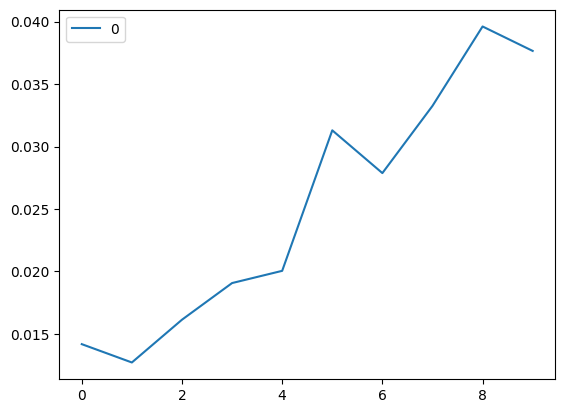

In [34]:
pd.DataFrame(history_3.history['val_accuracy']).plot()

In [35]:
model_3.evaluate(val_ds)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0378 - loss: 4.4827


[4.484172344207764, 0.03765281289815903]

In [39]:
import datetime
def create_model_checkpoint_callback(dirname, experiment_name): 
    log_dir = os.path.join(
        dirname, 
        experiment_name, 
        "ckpt-epoch{epoch:02d}.weights.h5"
    )

    callback = keras.callbacks.ModelCheckpoint(
        filepath=log_dir, 
        save_best_only=False, 
        save_weights_only=True, 
        save_freq="epoch"
    )
    return callback

In [37]:
## There comes the choke -- Transfer Learning 

base_model = keras.applications.EfficientNetV2B0(include_top=False) 
base_model.trainable = False 

inputs = keras.Input(shape=IMG_SIZE+(3,), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2d")(x) 
x = keras.layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

model_4 = keras.Model(inputs, outputs)

model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_4.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation_layer (Sequential) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_2d       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [40]:
history_4 = model_4.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    verbose=1, 
    callbacks=[callback, 
              create_model_checkpoint_callback(
                  dirname="logs/model_checkpoints/", 
                  experiment_name="dog_vision/EfficientNetV2B0"
              )]
)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.2527 - loss: 3.6891 - val_accuracy: 0.8200 - val_loss: 1.0292
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6374 - loss: 1.5172 - val_accuracy: 0.8587 - val_loss: 0.6180
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.6903 - loss: 1.1917 - val_accuracy: 0.8606 - val_loss: 0.5166
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6986 - loss: 1.0795 - val_accuracy: 0.8694 - val_loss: 0.4692
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7189 - loss: 0.9812 - val_accuracy: 0.8724 - val_loss: 0.4440
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7396 - loss: 0.9195 - val_accuracy: 0.8636 - val_loss: 0.4418
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7399 - loss: 0.9006 - val_accuracy: 0.8689 - val_loss: 0.4301
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7394 - loss: 0.8732 - val_a

In [43]:
model_4.evaluate(val_ds)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8788 - loss: 0.3846


[0.4079364538192749, 0.8733496069908142]

In [ ]:
## Fine tune lats n layers 

